In [1]:
%matplotlib inline
import pylab
import numpy as np
import pytry
import pandas
import seaborn

c:\users\terry\py35\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [32]:
#params = ['adapt_Kp', 'adapt_Kd']
params = ['adapt_Kp_x', 'adapt_Kd_x', 'adapt_Kp_y', 'adapt_Kd_y', 'adapt_Kp_z', 'adapt_Kd_z']

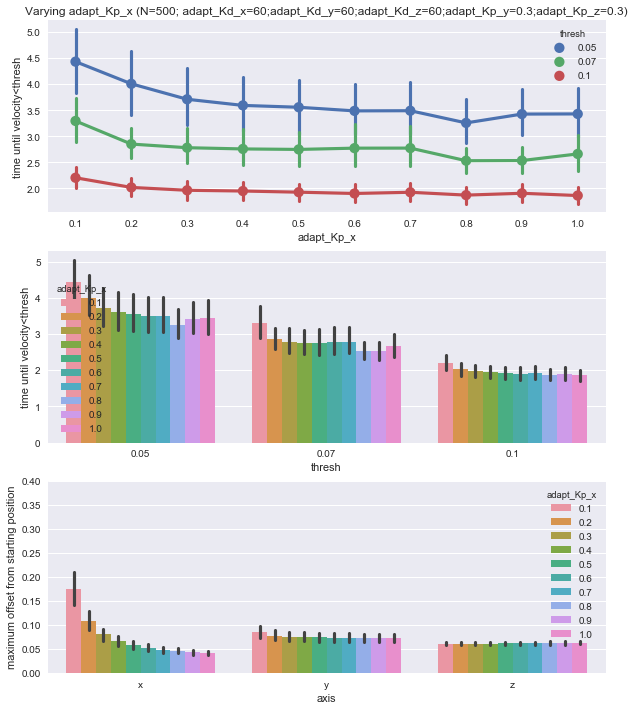

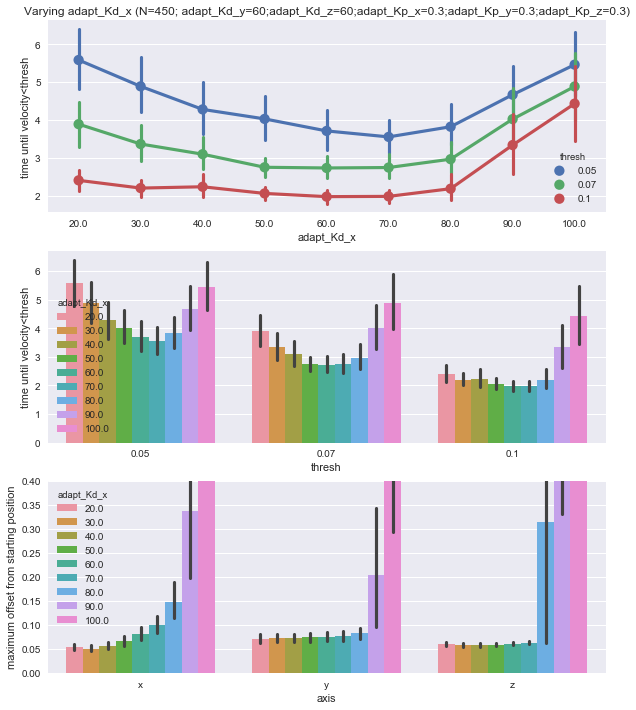

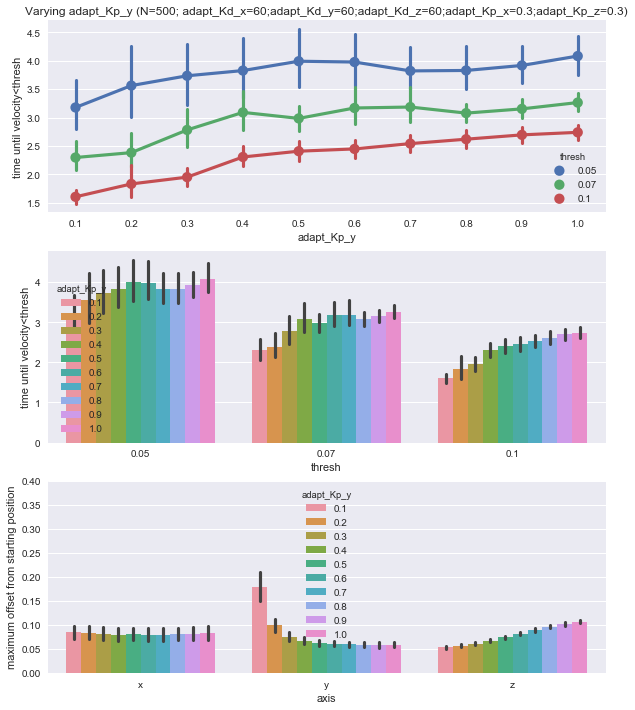

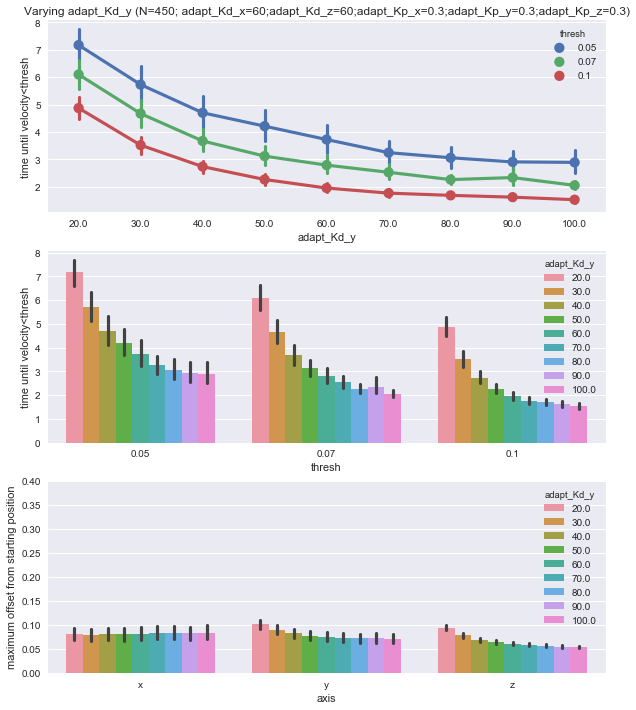

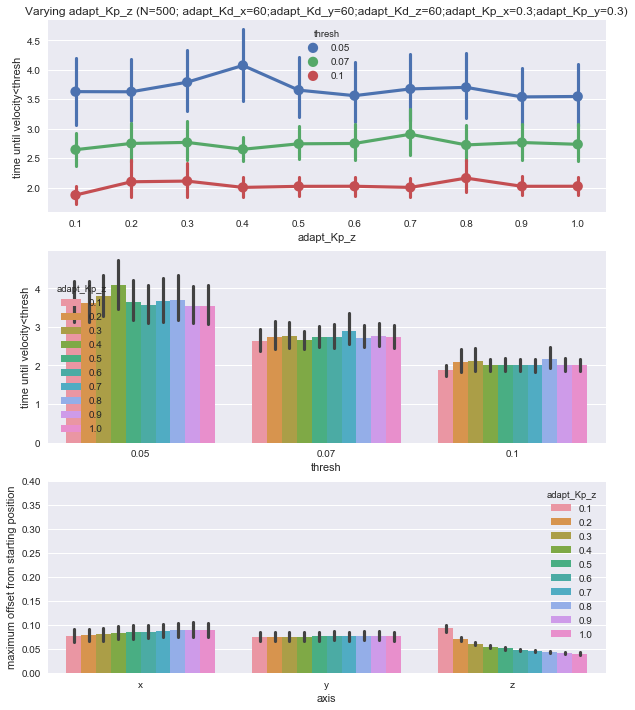

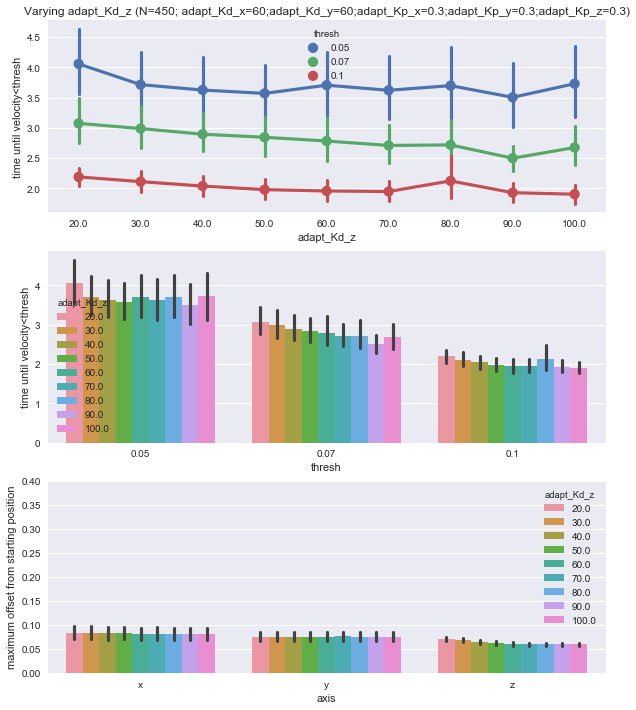

In [34]:
for param in params:

    data = pytry.read('vary_%s' % param)
    N = len(data)
    
    other_params = dict()
    for p in params:
        if p != param:
            other_params[p] = data[0][p]

    data2 = []
    data_xyz = []
    for d in data:
        for i, th in enumerate(d['thresholds']):
            dd = dict(d)
            dd['time_to_thresh'] = d['thresh_times'][i]
            dd['thresh']  = th
            del dd['thresholds']
            del dd['thresh_times']
            data2.append(dd)
        for i, axis in enumerate('xyz'):
            dd = dict(d)
            dd['offset'] = d['max_xyz'][i]
            dd['axis'] = axis
            data_xyz.append(dd)


    df = pandas.DataFrame(data2)
    df_xyz = pandas.DataFrame(data_xyz)
    
    pylab.figure(figsize=(10,12))
    pylab.subplot(3, 1, 1)
    seaborn.pointplot(param, 'time_to_thresh', hue='thresh', data=df)
    pylab.title('Varying %s (N=%d; %s)' % (param, N, ';'.join('%s=%g' % z for z in sorted(other_params.items()))))
    pylab.ylabel('time until velocity<thresh')
    pylab.subplot(3, 1, 2)
    seaborn.barplot('thresh', 'time_to_thresh', hue=param, data=df)
    pylab.ylabel('time until velocity<thresh')
    pylab.subplot(3, 1, 3)
    seaborn.barplot('axis', 'offset', hue=param, data=df_xyz)
    pylab.ylabel('maximum offset from starting position')
    pylab.ylim(0,0.4)